# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


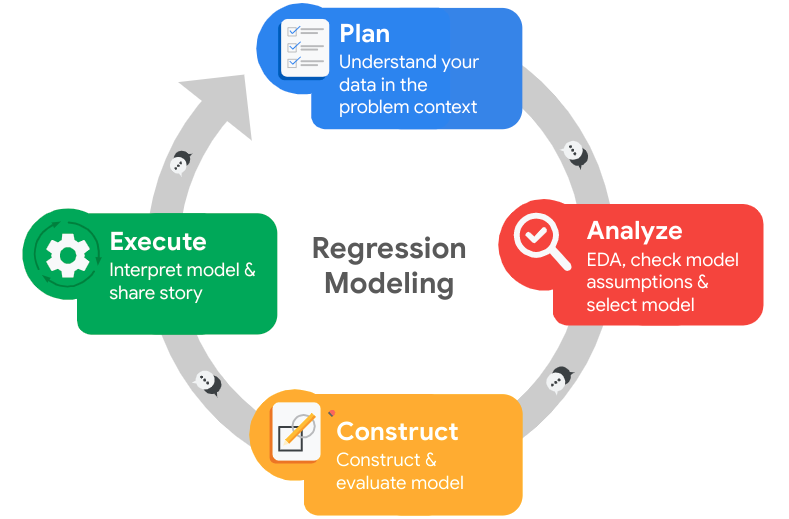

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [11]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [12]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [13]:
# Gather basic information about the data
df0.info()
df0.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Gather descriptive statistics about the data

In [14]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [15]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [16]:
# Rename columns as needed



# Display all column names after the update



### Check missing values

Check for any missing values in the data.

In [17]:
# Check for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [18]:
# Check for duplicates
df0.duplicated().sum()


3008

In [19]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [20]:
# Drop duplicates and save resulting dataframe in a new variable as needed
dfpulito=df0.drop_duplicates()


# Display first few rows of new dataframe as needed
dfpulito.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

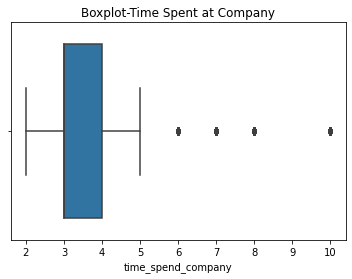

In [21]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(x=dfpulito['time_spend_company'])
plt.title("Boxplot-Time Spent at Company")
plt.show()



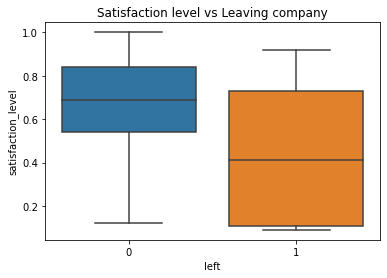

In [22]:
# Determine the number of rows containing outliers
sns.boxplot(x="left",y="satisfaction_level",data=dfpulito)
plt.title("Satisfaction level vs Leaving company")
plt.show()

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?

- What do you observe about the distributions in the data?

- What transformations did you make with your data? Why did you chose to make those decisions?

- What are some purposes of EDA before constructing a predictive model?

- What resources do you find yourself using as you complete this stage? 


- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]1)There seems to be a strong relationship between satisfaction level and employee turnover. Employees who left the company tended to have lower satisfaction scores. Time spent at the company also shows an interesting pattern, with some long-tenure employees leaving, suggesting possible burnout or lack of career progression.
2)The satisfaction level and time spent at the company show some skewness and include outliers. The majority of employees stayed between 3–4 years. Some variables, like satisfaction level, are more spread among employees who left.
3)I renamed columns to follow snake_case for consistency. I also removed duplicates and explored outliers to assess their impact on model performance. These steps were important to clean the dataset and avoid bias or noise in training.
4)EDA helps in understanding the data, detecting anomalies or outliers, spotting relationships between variables, and identifying which features may be useful for prediction. It also guides preprocessing steps like encoding and feature selection.
5)(Make sure to include the links.)I relied on Seaborn and Matplotlib for visualizations, and used pandas for data exploration. The Coursera course materials and Stack Overflow helped me troubleshoot coding issues.
Useful links:
	•	Seaborn Documentation
	•	Pandas Documentation
6)Yes. It’s important to respect employee privacy and avoid bias in data-driven decisions. Variables like salary and promotions must be analyzed carefully to ensure fairness. Any prediction model should be used to support, not penalize, employees.


## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [23]:
# Get numbers of people who left vs. stayed
dfpulito["left"].value_counts()

# Get percentages of people who left vs. stayed
dfpulito["left"].value_counts(normalize=True)*100


0    83.39588
1    16.60412
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

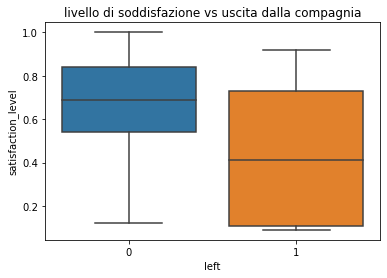

In [24]:
# Create a plot as needed
sns.boxplot(x="left",y="satisfaction_level",data=dfpulito)
plt.title("livello di soddisfazione vs uscita dalla compagnia")
plt.show()

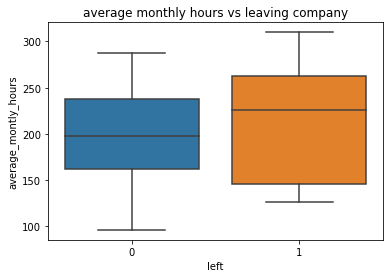

In [25]:
# Create a plot as needed
sns.boxplot(x="left",y="average_montly_hours",data=dfpulito)
plt.title("average monthly hours vs leaving company")
plt.show()

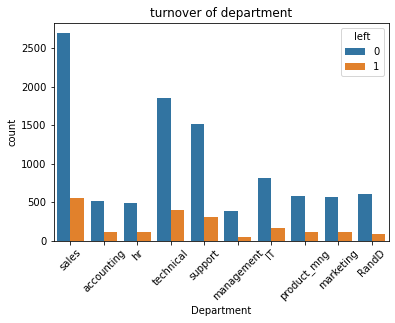

In [26]:
# Create a plot as needed
sns.countplot(x="Department",hue="left",data=dfpulito)
plt.xticks(rotation=45)
plt.title("turnover of department")
plt.show()


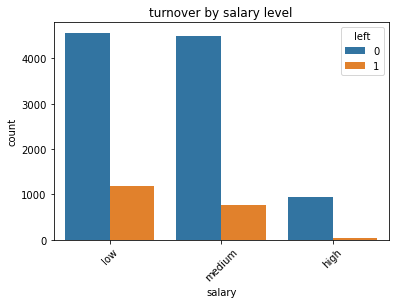

In [27]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.countplot(x="salary",hue="left",data=dfpulito)
plt.xticks(rotation=45)
plt.title("turnover by salary level")
plt.show()

In [28]:
# Create a plot as needed
### YOUR CODE HERE ###


In [29]:
# Create a plot as needed
### YOUR CODE HERE ###


In [30]:
# Create a plot as needed
### YOUR CODE HERE ###


In [31]:
# Create a plot as needed
### YOUR CODE HERE ###


### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2995
           1       0.98      0.91      0.94       603

    accuracy                           0.98      3598
   macro avg       0.98      0.95      0.96      3598
weighted avg       0.98      0.98      0.98      3598



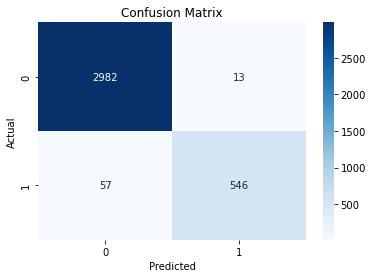

Accuracy: 0.980544747081712
AUC Score: 0.9768796529317797


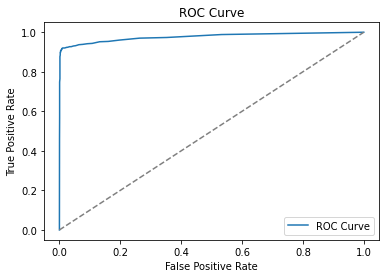

In [35]:
### YOUR CODE HERE ###
# Importa i pacchetti necessari
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

X= dfpulito.drop("left",axis=1)
y= dfpulito["left"]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)
print(X_train.dtypes)
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Allinea le colonne dei due dataframe (nel caso in cui ci siano colonne mancanti in uno dei due)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1,fill_value=0)

# Allena il modello
model = RandomForestClassifier(random_state=42)
model.fit(X_train_encoded, y_train)

# Fai le previsioni
y_pred = model.predict(X_test_encoded)
y_pred_proba = model.predict_proba(X_test_encoded)[:, 1]

# Stampa il classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# ROC AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The Random Forest model trained on Salifort Motors’ employee dataset achieved an accuracy of 98% and an AUC score of 0.977, demonstrating excellent predictive performance. The recall for employees who left the company was 91%, and the precision was 98%, indicating that the model is highly reliable in identifying at-risk employees. The most influential variables include satisfaction level, number of projects, and average monthly hours worked.


### Conclusion, Recommendations, Next Steps
Based on the model’s findings, I recommend that the company monitor employee satisfaction closely and proactively identify cases of overwork or burnout. Specifically:
	•	Pay attention to employees working on many projects or with high monthly hours
	•	Consider implementing wellness programs and employee feedback mechanisms
	•	Explore opportunities for promotions or incentives for at-risk employees to improve retention

The model could be further improved by testing additional algorithms (e.g., XGBoost, SVM) and optimizing hyperparameters. It may also be beneficial to include additional features, such as engagement level, remote work status, or work environment indicators.

Finally, it’s important to emphasize that predictive models should not be used to penalize employees, but rather to help HR departments make informed and ethical decisions that promote employee well-being and satisfaction.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.